## Análise de vendas da Cafelot

## Importando bibliotecas

In [1]:
!pip install seaborn
import seaborn as sns
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cafelot = pd.read_csv('dados/cafelot.csv')
cafelot

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [3]:
nomes_col = {
    'mes' : 'Mês',
    'vendas' : 'Vendas'
}

In [4]:
cafelot = cafelot.rename(columns = nomes_col)
cafelot

,Mês,Vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [5]:
print(f'Quantidade de linhas e colunas: {cafelot.shape}')
print(f'Quantidade de dados nulos: {cafelot.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [7]:
cafelot.dtypes

Mês       object
Vendas     int64
dtype: object

In [12]:
# Convertendo o Mês de object para date

cafelot['Mês'] = pd.to_datetime(cafelot['Mês'])
cafelot.dtypes

Mês       datetime64[ns]
Vendas             int64
dtype: object

## Plotando as vendas

In [19]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

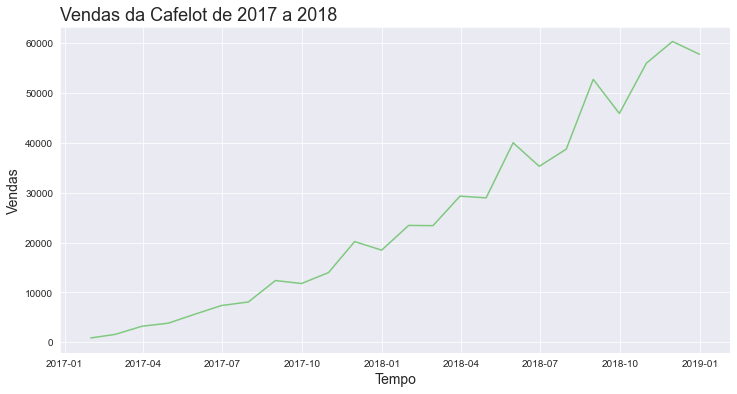

In [22]:
plotar('Vendas da Cafelot de 2017 a 2018', 'Tempo', 'Vendas', 
       'Mês', 'Vendas', cafelot)

## Vendas normalizadas conforme dias de finais de semana

In [23]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [25]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [26]:
cafelot['Vendas_normalizadas'] = cafelot['Vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelot

,Mês,Vendas,Vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


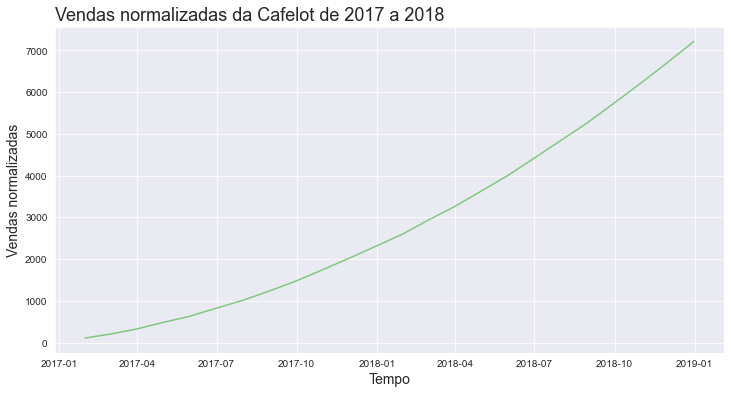

In [29]:
plotar('Vendas normalizadas da Cafelot de 2017 a 2018', 'Tempo', 'Vendas normalizadas',
      'Mês', 'Vendas_normalizadas', cafelot)

## Comparando os dois plots (vendas x vendas normalizadas)

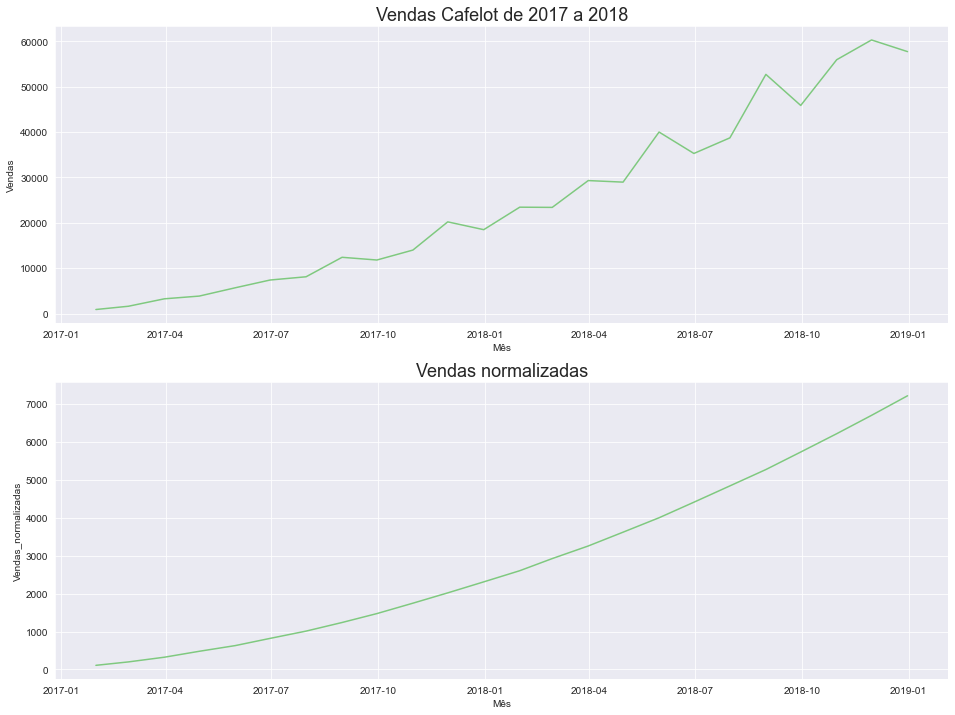

In [34]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(2 , 1, 1)
ax.set_title('Vendas Cafelot de 2017 a 2018', fontsize = 18)
sns.lineplot(x = 'Mês', y = 'Vendas', data = cafelot)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas', fontsize = 18)
sns.lineplot(x = 'Mês', y = 'Vendas_normalizadas', data = cafelot)
ax = ax